# **Microsoft Malware Prediction - EDA** <a id="0"></a> <br>

### Word of introduction

A vulnerability assessment against malware (malicious software) is one of the most important topics in the cyber security domain. Everyone wants to feel safe, right? The problem of malware infection may touch everyone from individual private people, through companies, up to governmental agencies. The malware itself is infectious software (mostly Trojan horses and viruses, but not only) that tries to misuse or cause damage to a computer, server as well as to extract/steal sensitive or private information. These data can be for example your bank account details, details of your credit cards, various passwords or any other confidential data (e.g. company’s internal documents).

In order to counteract to these threats, software providers (like our host IBM) are introducing active and passive countermeasures. These are for example anti-viruses and anti-malware software (active). In the case of IBM, these products are for example Microsoft Security Essentials (MSE) or well-known Windows Defender. Despite these active countermeasures, malware can get into the system by using security defects in the software itself, e.g. in various versions/builds of the operating system, internet browsers or their plugins. Therefore, operating systems and other software need to be updated from time to time in order to improve their performance and security.

In this competition, we are asked to assess the vulnerability of the machine (computer, server, etc.) based on its configuration.

If you want to learn more about the IBM's approach in fighting malware you may like to read [this article](https://securityintelligence.com/deeplocker-how-ai-can-power-a-stealthy-new-breed-of-malware/) or navigate to [IBM Research](http://www.research.ibm.com/) page to learn more about general research topics in IBM.

### Exploratory Data Analysis.

The first step is to read libraries we will use in our analysis. 

The basic libraries set for data analysis:
* [numpy](http://www.numpy.org/) - the fundamental package for scientific computing
* [pandas](https://pandas.pydata.org/) - datastructures and data analysis tools library
* [matplotlib](https://matplotlib.org/) - data visualisation
* [seaborn](https://seaborn.pydata.org/) - data visualisation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import os
print(os.listdir("../input"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
#unhide cell above if you want to see the data types
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = [c for c,v in dtypes.items() if v in numerics]
categorical_columns = [c for c,v in dtypes.items() if v not in numerics]

In [4]:
retained_columns = numerical_columns + categorical_columns
train = pd.read_csv('../input/train.csv',usecols = retained_columns,dtype = dtypes)

'''
Alternatively you can read data in chunks of e.g. 1000 MB
'''
#chunksize = 100000
#train = None
#
#for chunk in pd.read_csv("../input/train.csv", chunksize=chunksize, iterator=True):
#    if train is None:
#        train=chunk.copy()
#    else:
#        train.append(chunk)

'\nAlternatively you can read data in chunks of e.g. 1000 MB\n'

Lets look at the first few rows to inspect the resulting database visually.

In [5]:
train.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,-85,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.906250,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.898438,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4908.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.500000,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.500000,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014

From the first glance database looks fine:
* There are all heading
* No strange symbols in the rows

Let's see what shape our database have.

In [6]:
train.shape

(8921483, 83)

There are 100 000 machines (observations), each with 83 parameters (columns).

Time to look at some basic statistics of the columns.

In [7]:
train.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,8.921483e+06,8889165.0,8.921483e+06,433438.0,8.885262e+06,8885262.0,8885262.0,8.921483e+06,8.921483e+06,8.596074e+06,6169965.0,8921270.0,8.921483e+06,8.921483e+06,8.921483e+06,8885439.0,8.921483e+06,8.383724e+06,8862589.0,8830133.0,8.910645e+06,8826005.0,8.819250e+06,8880177.0,8880170.0,8880140.0,8.868467e+06,8.868481e+06,8.921483e+06,8.840950e+06,8.874349e+06,8874497.0,8874497.0,8.652728e+06,8.921483e+06,8.921483e+06,8861399.0,8.921483e+06,8.921483e+06,1.512724e+06,8.760960e+06,3.254158e+06,8738226.0,8.761350e+06,8.921483e+06,3.261780e+06,8.905530e+06,8.921483e+06,8.921483e+06,8850140.0,8618032.0,8618032.0,8.921483e+06
mean,7.509962e-06,NaN,1.733378e-02,NaN,4.948320e+04,NaN,NaN,9.879711e-01,1.080490e+02,8.049152e+04,NaN,NaN,2.790453e+01,1.571997e+04,5.751534e+02,NaN,2.891896e-05,4.649162e-04,NaN,NaN,1.216142e+01,NaN,2.378578e+05,NaN,NaN,NaN,2.912138e+06,3.823069e+05,7.718728e-02,6.109390e+03,NaN,NaN,NaN,1.123782e+09,1.583483e+04,9.730490e+02,NaN,6.046534e+01,5.452008e-04,1.388788e-05,1.007318e-05,2.508163e-04,NaN,3.268055e+04,4.860229e-01,2.980232e-07,7.202148e-03,1.255431e-01,3.807091e-02,NaN,NaN,NaN,4.997927e-01
std,2.740421e-03,0.0,1.305118e-01,NaN,1.379994e+04,0.0,0.0,1.090149e-01,6.304706e+01,4.873461e+04,0.0,NaN,6.560791e+01,2.190685e+03,2.480847e+02,0.0,5.377558e-03,2.104187e-02,NaN,0.0,9.867765e+03,NaN,7.148446e+04,0.0,0.0,NaN,4.451633e+09,3.233614e+05,2.668884e-01,4.971148e+03,0.000000e+00,NaN,NaN,1.933305e+09,1.961743e+03,2.931971e+03,0.0,4.499992e+01,2.334317e-02,3.726959e-03,3.173828e-03,1.582336e-02,NaN,2.112612e+04,4.998046e-01,5.459785e-04,8.453369e-02,3.313338e-01,1.913675e-01,0.0,0.0,0.0,5.000000e-01
min,0.000000e+00,0.0,0.000000e+00,1.0,3.000000e+00,0.0,0.0,0.000000e+00,1.000000e+00,5.000000e+00,1.0,1.0,-1.280000e+02,7.600000e+03,1.600000e+01,0.0,0.000000e+00,0.000000e+00,1.0,0.0,0.000000e+00,1.0,1.000000e+00,1.0,1.0,2.0,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,7.001953e-01,-1.0,-1.0,0.000000e+00,7.600000e+03,0.000000e+00,1.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.0,0.000000e+00
25%,0.000000e+00,7.0,0.000000e+00,788.0,4.948000e+04,1.0,1.0,1.000000e+00,5.100000e+01,3.682500e+04,18.0,89.0,-2.900000e+01,1.506300e+04,2.560000e+02,1.0,0.000000e+00,0.000000e+00,111.0,1.0,1.000000e+00,1443.0,1.896920e+05,2.0,5.0,1998.0,2.393720e+05,1.207750e+05,0.000000e+00,4.096000e+03,1.389844e+01,1366.0,768.0,0.000000e+00,1.506300e+04,1.670000e+02,8.0,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,142.0,1.315600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,3.0,0.000000e+00
50%,0.000000e+00,7.0,0.000000e

From the above snapshot and columns names it is obvious that some of these parameters are binary (yes/no or 1/0).
Let's list them.

In [8]:
for column in train.select_dtypes(include=['float','int']):
    if train[column].min() == 0 and train[column].max() == 1 :
        print(column)

In [9]:
#categorical_cols=['PuaMode', 'Census_ProcessorClass', 'Census_InternalBatteryType','SmartScreen','Census_PrimaryDiskTypeName', 'Census_ChassisTypeName','Census_OSInstallTypeName','Census_OSSkuName', 'Census_OSEdition','Census_OSWUAutoUpdateOptionsName',
#'Census_GenuineStateName','Census_ActivationChannel', 'Census_FlightRing',
#'MachineIdentifier','Census_OSBranch', 'Census_OSArchitecture', 'EngineVersion',
#'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer','OsPlatformSubRelease',
#'OsBuildLab', 'SkuEdition','Census_MDC2FormFactor', 'ProductName', 'Census_PowerPlatformRoleName',
#'Census_OSVersion']
#
#for column in train:
#    if column in categorical_cols:
#        train[column]=train[column].astype('category')

Let's see how many missing values we have in each column. If we have a lot of missing values in a column we may consider dropping it from the analysis.

In [10]:
nans = []
pcts = []
for cols in train:
    nans.append(train[cols].isnull().sum())
    pcts.append(train[cols].isnull().sum()/train.shape[0]*100)

In [11]:
missing_data = pd.DataFrame({"Col":train.columns,"Missing values": nans, "Pct missing [%]": pcts}).sort_values("Missing values", ascending=False)
missing_data[missing_data["Missing values"]!=0].reset_index(drop=True)

,Col,Missing values,Pct missing [%]
0,PuaMode,8919174,99.974119
1,Census_ProcessorClass,8884852,99.589407
2,DefaultBrowsersIdentifier,8488045,95.141637
3,Census_IsFlightingInternal,7408759,83.044030
4,Census_InternalBatteryType,6338429,71.046809
5,Census_ThresholdOptIn,5667325,63.524472
6,Census_IsWIMBootEnabled,5659703,63.439038
7,SmartScreen,3177011,35.610795
8,OrganizationIdentifier,2751518,30.841487
9,SMode,537759,6.027686


There are:
74 columns without missing values
35 columns with less than 10% of missing values
 2 columns withmissing values between 10% and 50%
 7 columns with more than 50% of missing values


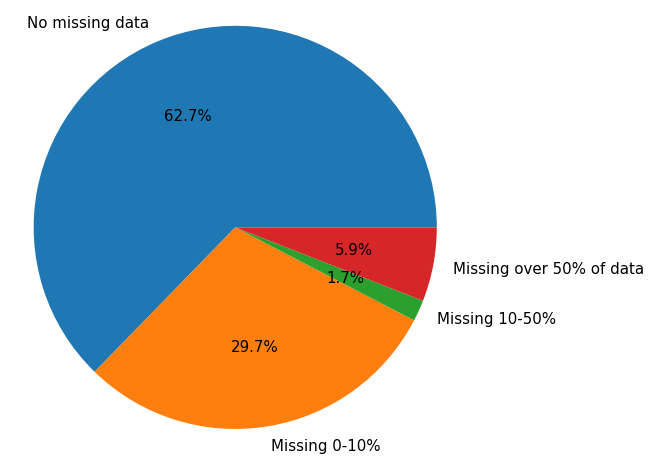

In [12]:
complete = (missing_data["Pct missing [%]"]<=10).sum()
a = ((missing_data["Pct missing [%]"]!=0) & (missing_data["Pct missing [%]"]<=10)).sum()
b = ((missing_data["Pct missing [%]"]>10) & (missing_data["Pct missing [%]"]<=50)).sum()
c = (missing_data["Pct missing [%]"]>50).sum()
print("There are:\n{} columns without missing values\n{} columns with less than 10% of missing values\n {} columns withmissing values between 10% and 50%\n {} columns with more than 50% of missing values".format(complete,a,b,c))

labels =["No missing data", "Missing 0-10%", "Missing 10-50%", "Missing over 50% of data"]
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie([complete,a,b,c],autopct='%1.1f%%',labels=labels, textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

In [13]:
detect_no = (train["HasDetections"]==0).sum()
detect_yes = (train["HasDetections"]==1).sum()

print(detect_no,detect_yes)

4462591 4458892


Our target column is named "*HasDetections*". it is worth looking how many detections we have in our database.

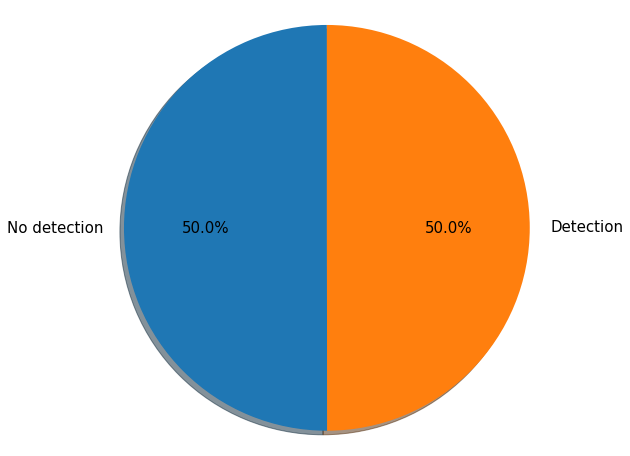

In [14]:
labels = 'No detection', 'Detection',
sizes = [detect_no, detect_yes]

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, textprops={'fontsize': 15})
ax1.axis('equal')

plt.show()

It looks that our database is fairly balanced.

Later we will want to divide our machines into few categories so let's look for example at the Product Name, Engine Versions, Platform, Census_MDC2FormFactor and OsSuite categories.


Let's investigate first Product Name column. Here we have to categories:
1. win8defender (Defender in Windows 8)
2. mse (Microsoft Security Essentials)

In such comparisons it is very important to look always at absolute and relative numbers together in order to correctly interpret the results.

In [15]:
def my_graphs1(col_name, rotation=45, threshold=0.01, explode =-1):
    '''
    This function creates two graphs: categories distribution (pie chart) and fraction of infected machines in each category (bar graph).
    It accepts explode, rotationand thresholf arguments to increase the clarity of the pie chart as well.
    '''
    category = train[col_name].unique().tolist()
    totals=[]
    infected=[]
    
    for item in category:
        a = (train[col_name]==item).sum()
        totals.append(a)
        infected.append((train[train[col_name]==item]["HasDetections"]==1).sum()/a)
        
    #creating a summary dataframe
    df = pd.DataFrame({"Total":totals,"Infected": infected}, index=category).sort_values("Total", ascending=False) 
    fig, ax = plt.subplots(ncols=2, nrows=1,figsize=(20,8))
    
    #creating a pie chart with conditional explode option
    threshold = train.shape[0]*threshold

    if explode==-1:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15})
    else:
        ax[0].pie(df[df["Total"]>threshold]["Total"], labels=df[df["Total"]>threshold].index.values, autopct='%1.1f%%',shadow=False, startangle=rotation, textprops={'fontsize': 15}, explode=explode)
    ax[0].axis('equal')
    ax[0].set_title(col_name)
    
    #created a sorted bar chart
    df.sort_values("Infected", ascending=False, inplace=True)
    ax[1].set_xticklabels(category,rotation=45, horizontalalignment='right')
    ax[1].set_title('Infected fractions')
    ax[1] = sns.barplot(x=df.index, y="Infected",data=df)
    plt.show()

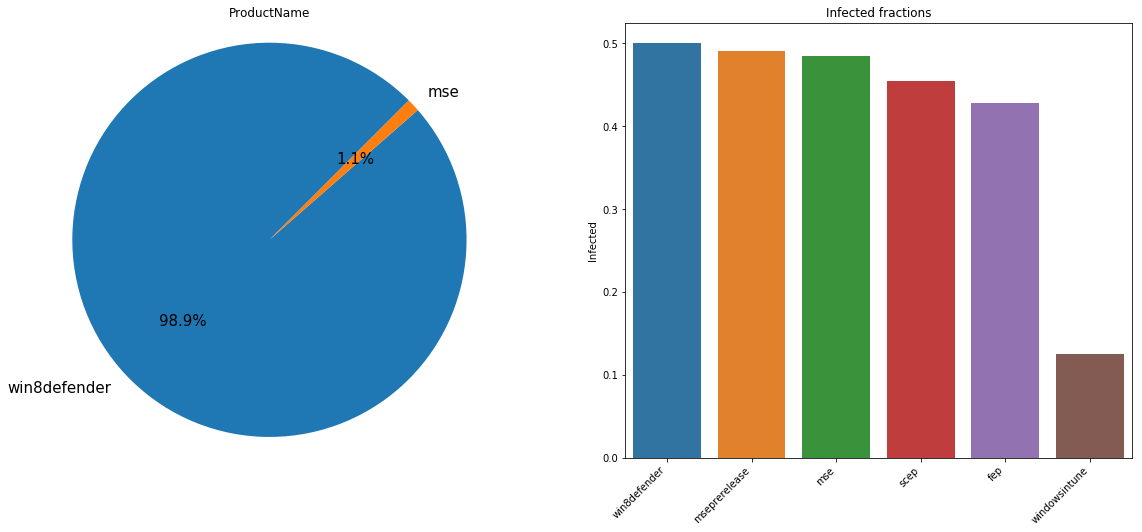

In [16]:
my_graphs1("ProductName",45)

Above graphs clearly shows that vast majority of machines have Windows 8 Defender installed. However, in terms of percentage of infected computers in each category both are similar - around 50%.

Let's see now platforms:
1. Windows 10
2. Windows 8
3. Windows 7
4. Windows 2016

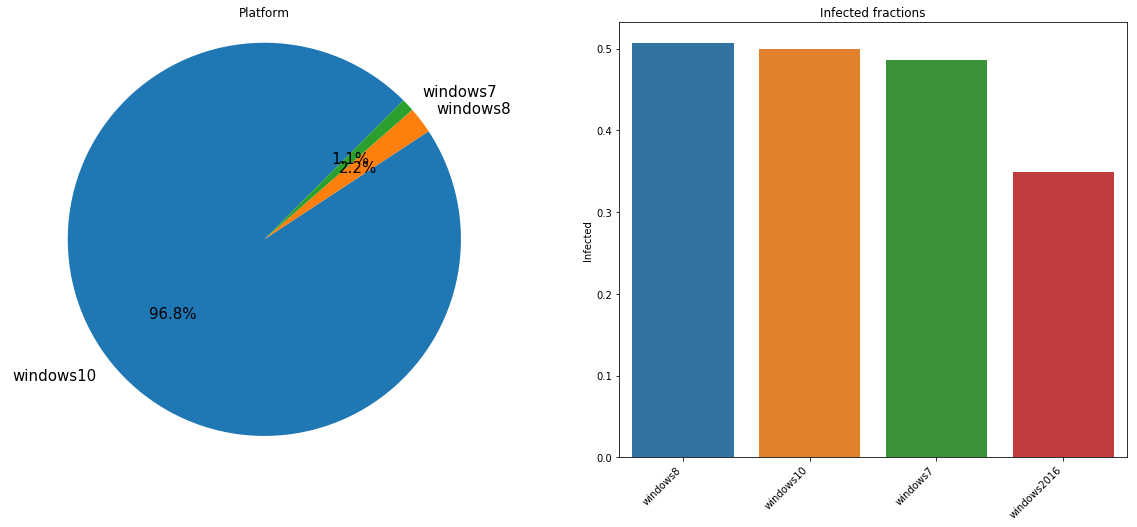

In [17]:
my_graphs1("Platform",45)

Census_MDC2FormFactor:
1. 'Desktop'
2. 'Notebook'
3. 'Detachable' 
4. 'PCOther'
5. 'AllInOne'
6. 'Convertible'
7. 'SmallTablet' 
8. 'LargeTablet' 
9.  'SmallServer'
10. 'LargeServer'
11. 'MediumServer'
12. 'ServerOther'

For clarity I will filter pie chart values only for these contributing more than 1%


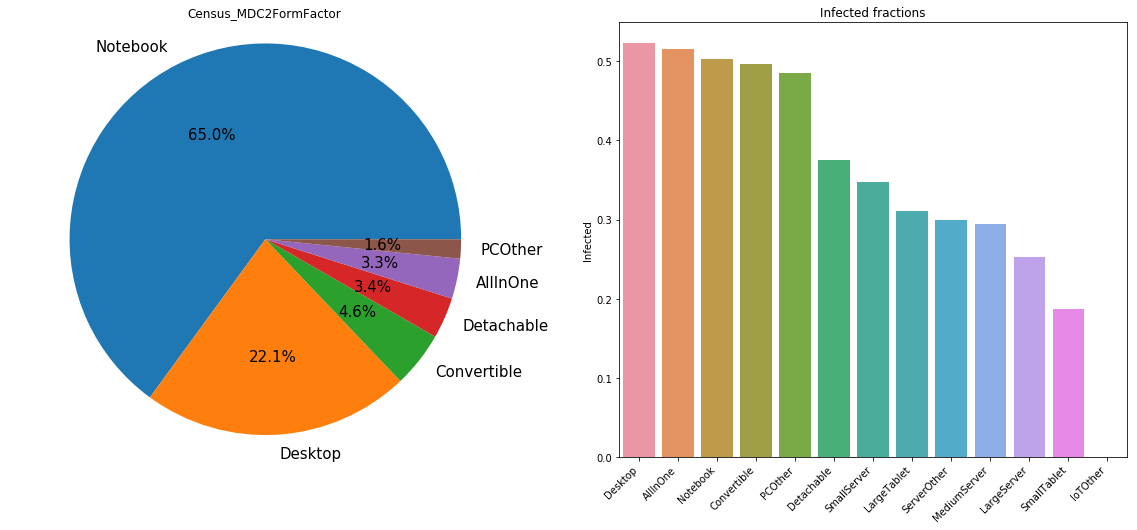

In [18]:
my_graphs1("Census_MDC2FormFactor",0)

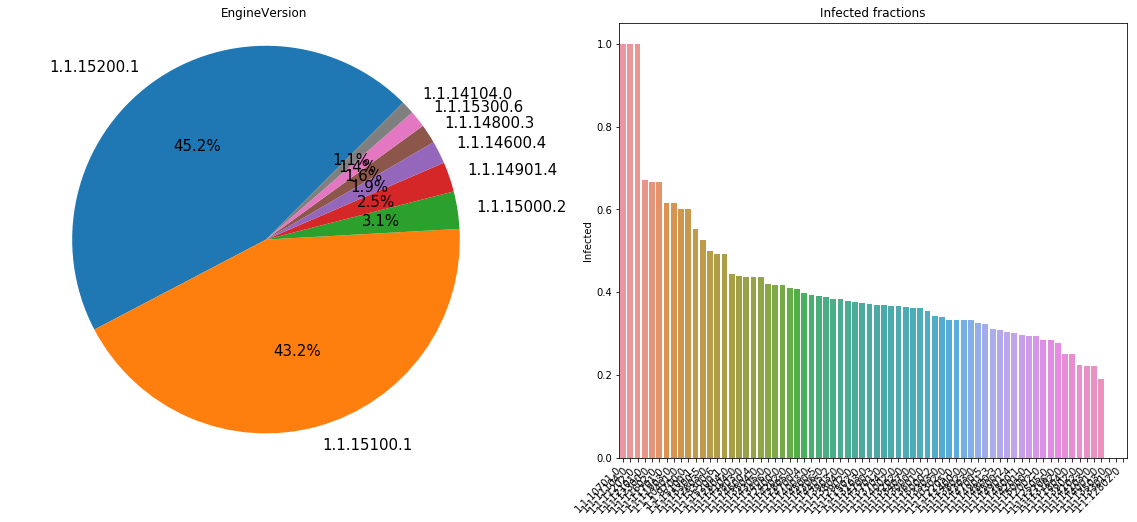

In [19]:
my_graphs1("EngineVersion",45)

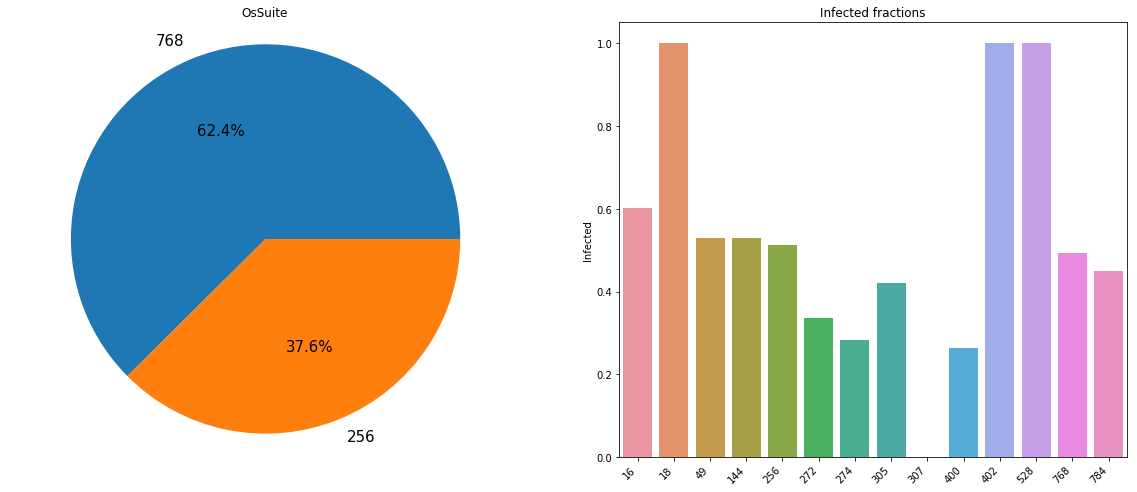

In [20]:
my_graphs1("OsSuite",0)

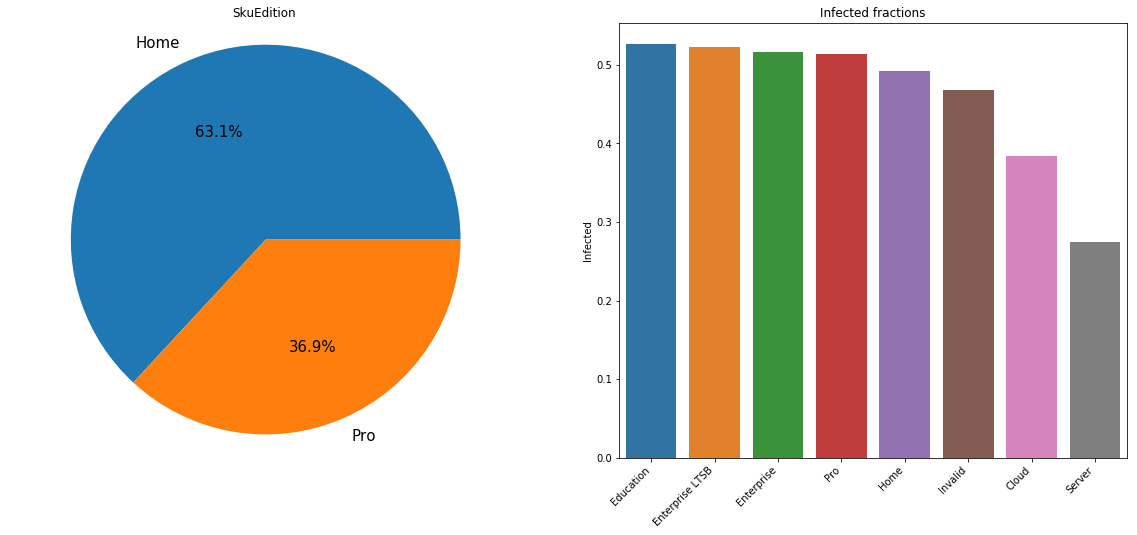

In [21]:
my_graphs1("SkuEdition",0)

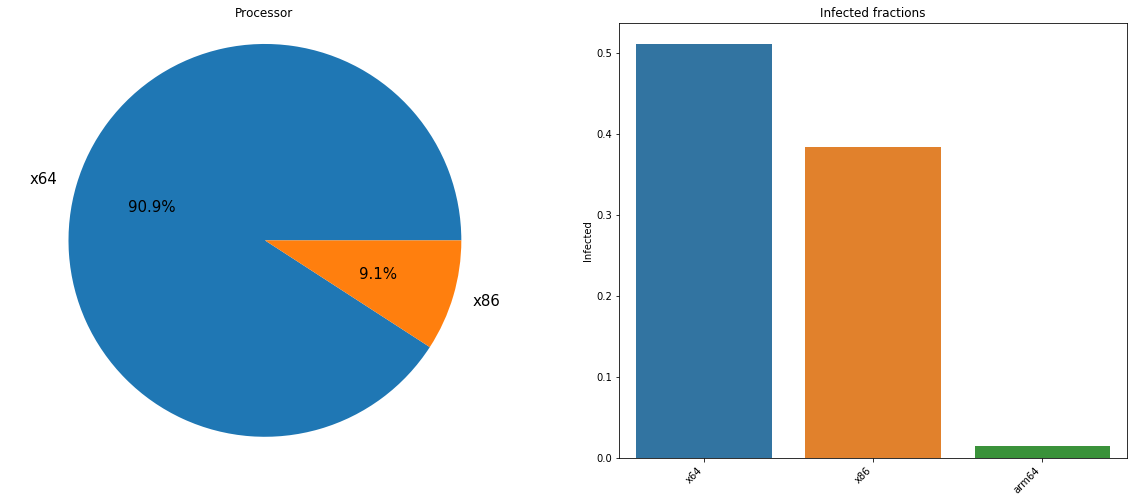

In [22]:
my_graphs1('Processor',0)

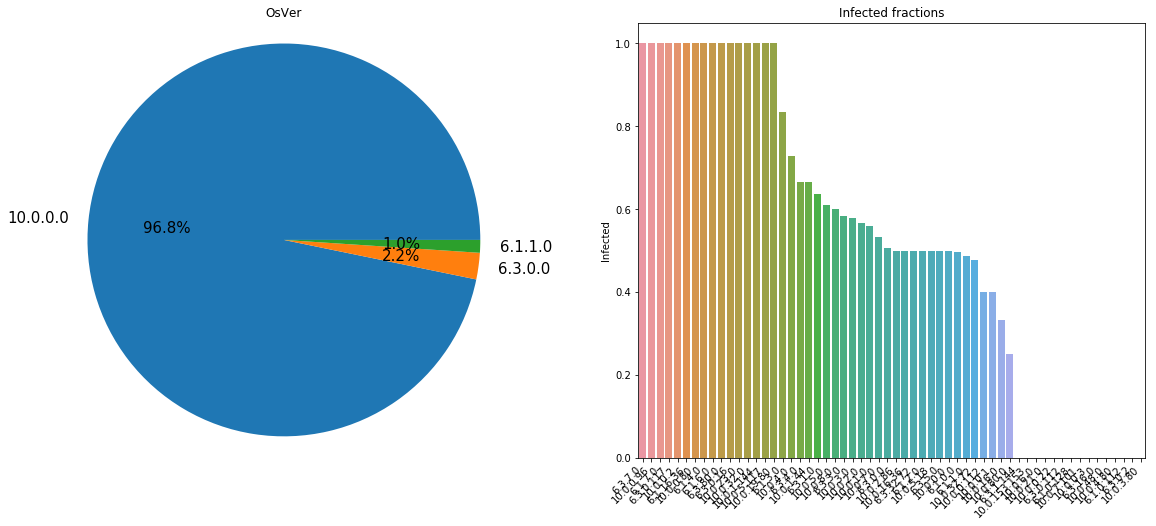

In [23]:
my_graphs1('OsVer',0)

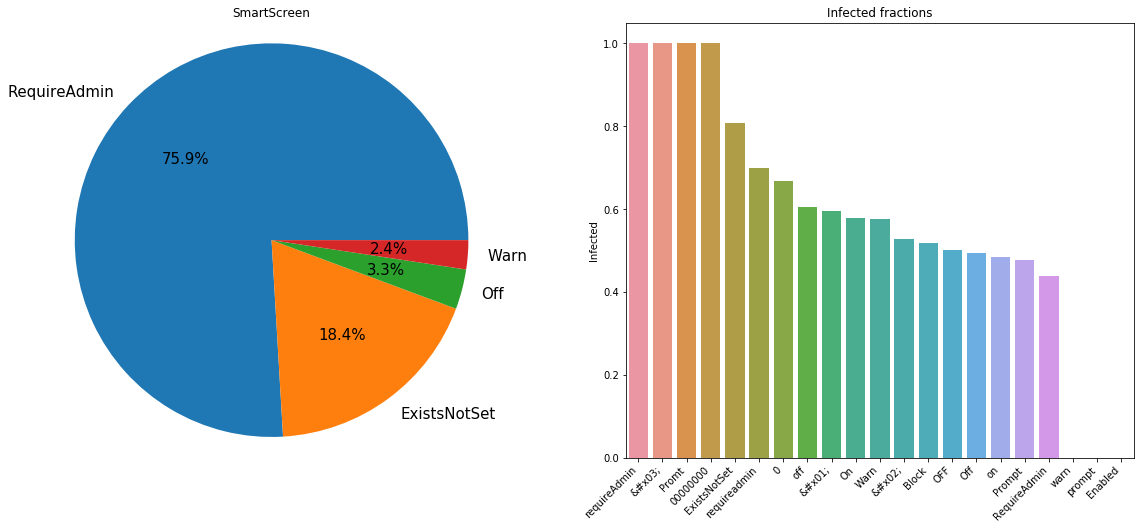

In [24]:
my_graphs1('SmartScreen',0)

Below a simple histogram of countries identifier. I'll dwell on this a bit more soon.

Number of country identifiers: 222
The most frequent country identifier: 43


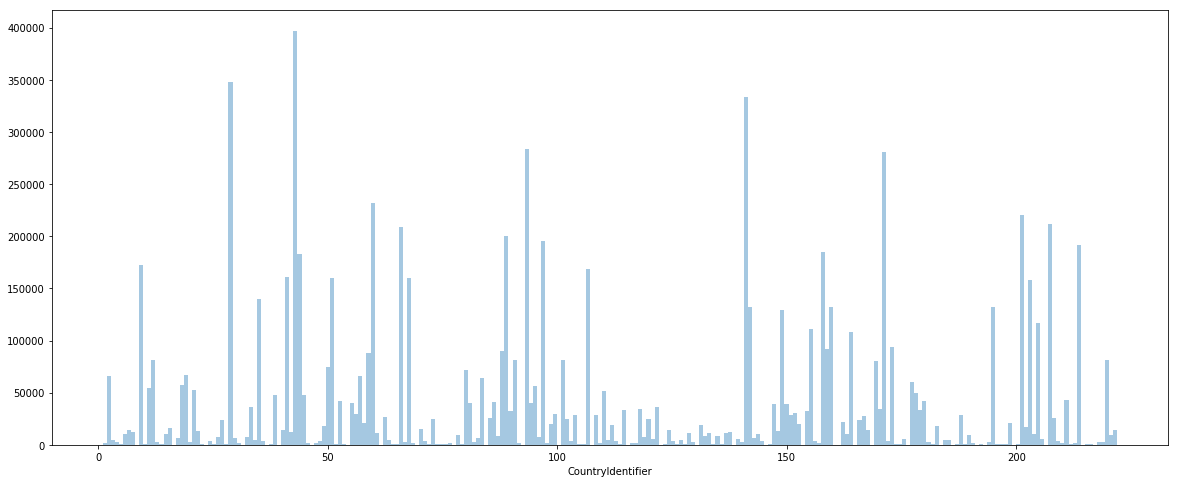

In [25]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(20,8))
ax = sns.distplot(train["CountryIdentifier"], kde=False, bins=250)

print("Number of country identifiers: " + str(train["CountryIdentifier"].nunique()))
print("The most frequent country identifier: " + str(train["CountryIdentifier"].mode()[0]))